In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Clean

In [102]:
## Import, clean and join datasets
tabs = ["CW0302_1920", "CW0302_1819","CW0302_1718","CW0302_1617"]

column_names = ["Geography Code", "Area name", 
                "Any_Once per month", "Any_Once per week","Any_Three times per week",  "Any_Five times per week", 
                "Leisure_Once per month", "Leisure_Once per week","Leisure_Three times per week", "Leisure_Five times per week", 
                "Travel_Once per month", "Travel_Once per week","Travel_Three times per week", "Travel_Five times per week" ]

dfs = []

#loop through all tabs and join
for tab in tabs:
    #import
    df = pd.read_excel("cw0302.xlsx", sheet_name=tab, skiprows=7)
    df = df[~df[df.columns[1]].isnull()] #remove empty rows
    df = df.dropna(axis=1, how='all') #remove empty columns
    
    #rename columns
    df.columns = column_names
    
    #melt frame
    df = pd.melt(df, id_vars=["Geography Code", "Area name"], var_name="Type", value_name="Proportion")
    
    #clean up columns
    df["Frequency"] = [ sub[1] for sub in df["Type"].str.split("_")]
    df["Type"] = [ sub[0] for sub in df["Type"].str.split("_")]
    
    #add year column
    df["Survey_Period"] = "20" + tab.split("_")[1][:2] + "/" + tab.split("_")[1][2:]
    df["Year"] = "20" + tab.split("_")[1][2:] 

    dfs.append(df)

#join all tables
df = pd.concat(dfs, axis=0)

df.head()

,Geography Code,Area name,Type,Proportion,Frequency,Survey_Period,Year
0,E92000001,ENGLAND,Any,16.0952,Once per month,2019/20,2020
1,E12000001,North East,Any,12.5762,Once per month,2019/20,2020
2,E06000047,County Durham,Any,9.6027,Once per month,2019/20,2020
3,E06000005,Darlington,Any,13.0619,Once per month,2019/20,2020
4,E06000001,Hartlepool,Any,10.2977,Once per month,2019/20,2020


# London map

In [90]:
pos_dict = {'E09000001': 29,  'E09000002': 32, 'E09000003': 12, 'E09000004': 40,  'E09000005': 19, 'E09000006': 46,
           'E09000007': 20, 'E09000008': 45,  'E09000009': 18,  'E09000010': 5,  'E09000011': 39,  'E09000012': 22,
           'E09000013': 26,  'E09000014': 13,  'E09000015': 11,  'E09000016': 24, 'E09000017': 17,  'E09000018': 25,
           'E09000019': 21,  'E09000020': 27,  'E09000021': 43, 'E09000022': 36,  'E09000023': 38,  'E09000024': 44,
           'E09000025': 31,  'E09000026': 23,  'E09000027': 34,  'E09000028': 37,  'E09000029': 52,  'E09000030': 30,
           'E09000031': 14,  'E09000032': 35,  'E09000033': 28}

In [125]:
display_dict = {'E09000007': 'CMD', 'E09000001': 'CTY', 'E09000012': 'HCK', 'E09000013': 'HMS', 'E09000014': 'HGY',
             'E09000019': 'ISL', 'E09000020': 'KNS', 'E09000022': 'LAM', 'E09000023': 'LSH', 'E09000025': 'NWM',
             'E09000028': 'SWR', 'E09000030': 'TOW', 'E09000032': 'WNS', 'E09000033': 'WST', 'E09000002': 'BAR',
             'E09000003': 'BRN', 'E09000004': 'BXL',  'E09000005': 'BRT',  'E09000006': 'BRM',  'E09000008': 'CRD',
             'E09000009': 'ELG',  'E09000010': 'ENF',  'E09000011': 'GRN',  'E09000015': 'HRW',  'E09000016': 'HVG',
             'E09000017': 'HDN',  'E09000018': 'HNS',  'E09000021': 'KNG',  'E09000024': 'MRT',  'E09000026': 'RDB',
             'E09000027': 'RCH',  'E09000029': 'STN',  'E09000031': 'WTH'}

In [139]:
table = df[df["Geography Code"].isin(pos_dict.keys())]
table

,Geography Code,Area name,Type,Proportion,Frequency,Survey_Period,Year
218,E09000007,Camden,Any,22.2511,Once per month,2019/20,2020
219,E09000001,City of London,Any,20.4931,Once per month,2019/20,2020
220,E09000012,Hackney,Any,37.4197,Once per month,2019/20,2020
221,E09000013,Hammersmith and Fulham,Any,28.0155,Once per month,2019/20,2020
222,E09000014,Haringey,Any,18.6020,Once per month,2019/20,2020
...,...,...,...,...,...,...,...
4330,E09000024,Merton,Travel,3.9935,Five times per week,2016/17,2017
4331,E09000026,Redbridge,Travel,0.6647,Five times per week,2016/17,2017
4332,E09000027,Richmond upon Thames,Travel,4.1149,Five times per week,2016/17,2017
4333,E09000029,Sutton,Travel,1.0211,Five times per week,2016/17,2017


In [187]:
filt = (table["Type"] == "Any") & (table["Year"]=="2020")
order = [ 'Once per month', 'Once per week',
       'Three times per week', 'Five times per week']
pivot = table[filt].pivot(index="Area name", columns="Frequency", values="Proportion")
pivot = pivot[order]
pivot

Frequency,Once per month,Once per week,Three times per week,Five times per week
Area name,,,,
Barking and Dagenham,8.4830,6.2855,3.5504,1.7796
Barnet,10.2493,7.0642,4.1356,2.7616
Bexley,6.8080,4.7666,2.7775,2.0354
Brent,12.5926,9.9423,6.0644,2.2697
Bromley,14.8496,11.9086,4.9861,2.1294
Camden,22.2511,15.5578,7.8318,4.8572
City of London,20.4931,15.7011,6.7722,2.3649
Croydon,8.5081,5.9095,2.9058,1.4604
Ealing,15.9602,12.8884,6.8483,4.5747


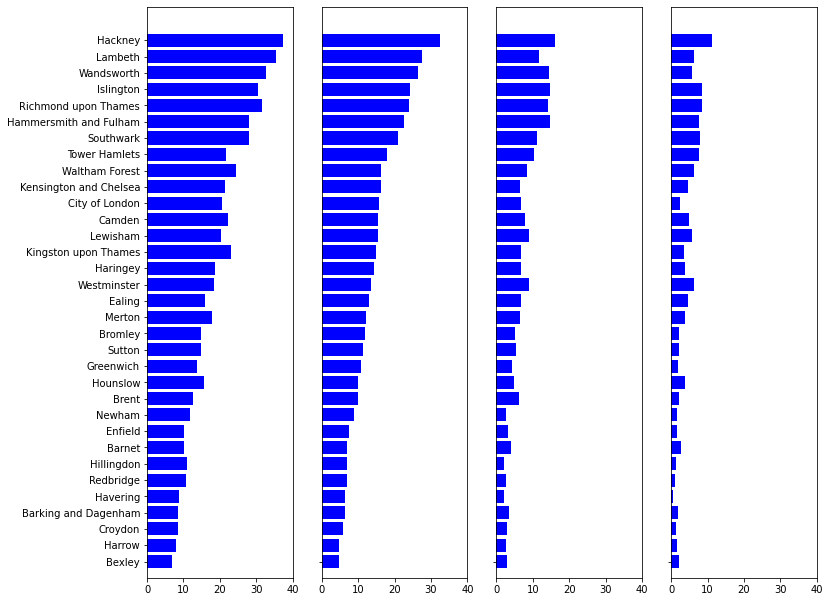

In [188]:
data = pivot.sort_values(by="Once per week", ascending=True)

###plot

fig, ax = plt.subplots(figsize=(12,10.5), sharey=True)

y = np.arange(len(data))

num = 0
for column in data.columns:
    num+=1
    plt.subplot(1,4,num)
    
    plt.barh(y, data[column],
            color='blue',zorder=2)
    
    #xaxis
    plt.gca().set_xlim(xmin=0, xmax=40)
    
    #yaxis
    plt.gca().set_ylim(ymin=-1)
    if num ==1:
        plt.yticks(np.arange(0,len(data), 1), data.index, label=11)
    else:
        plt.yticks([0], [""])
              
plt.show()